In [147]:
import cv2
import matplotlib.pyplot as pyplot
import numpy as np

region of interest was cropped

trying to not print the same box multiple times

In [157]:
image = cv2.imread('../HW2/airport.jpg')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template_1 = cv2.imread('./airport.jpg', cv2. IMREAD_GRAYSCALE)
template_2 = cv2.imread('./airport (1).png', cv2. IMREAD_GRAYSCALE)
template_3 = cv2.imread('./airport (2).jpg', cv2. IMREAD_GRAYSCALE)
template_4 = cv2.imread('./airport (3).jpg' , cv2. IMREAD_GRAYSCALE)

w, h = template_1.shape[::-1]
treshold=0.4


In [158]:
def NMS(boxes, overlapThresh = 0.4):
    #return an empty list, if no boxes given
    if len(boxes) == 0:
        return []
    x1 = boxes[:, 0]  # x coordinate of the top-left corner
    y1 = boxes[:, 1]  # y coordinate of the top-left corner
    x2 = boxes[:, 2]  # x coordinate of the bottom-right corner
    y2 = boxes[:, 3]  # y coordinate of the bottom-right corner
    # compute the area of the bounding boxes and sort the bounding
    # boxes by the bottom-right y-coordinate of the bounding box
    areas = (x2 - x1 + 1) * (y2 - y1 + 1) # We have a least a box of one pixel, therefore the +1
    indices = np.arange(len(x1))
    for i,box in enumerate(boxes):
        temp_indices = indices[indices!=i]
        xx1 = np.maximum(box[0], boxes[temp_indices,0])
        yy1 = np.maximum(box[1], boxes[temp_indices,1])
        xx2 = np.minimum(box[2], boxes[temp_indices,2])
        yy2 = np.minimum(box[3], boxes[temp_indices,3])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        # compute the ratio of overlap
        overlap = (w * h) / areas[temp_indices]
        if np.any(overlap) > treshold:
            indices = indices[indices != i]
    return boxes[indices].astype(int)

def bounding_boxes(image, template):
    (tH, tW) = template.shape[:2]             # getting height and width of template 
    imageGray = cv2.cvtColor(image, 0)        # convert the image to grayscale
    templateGray = cv2.cvtColor(template, 0)  # convert the template to grayscale

    result = cv2.matchTemplate(imageGray, templateGray, cv2.TM_CCOEFF_NORMED)  # template matching return the correlatio 
    (y1, x1) = np.where(result >= treshold)  # object is detected, where the correlation is above the treshold
    boxes = np.zeros((len(y1), 4))      # construct array of zeros
    x2 = x1 + tW                       # calculate x2 with the width of the template
    y2 = y1 + tH                       # calculate y2 with the height of the template
    # fill the bounding boxes array
    boxes[:, 0] = x1                 
    boxes[:, 1] = y1
    boxes[:, 2] = x2
    boxes[:, 3] = y2
    return boxes.astype(int)


[[1393   94 1578  253]
 [1394   94 1579  253]
 [1390   95 1575  254]
 ...
 [  61 1021  212 1210]
 [ 459 1021  610 1210]
 [ 460 1021  611 1210]] (2503, 4)
another one
[[1393   94 1578  253]
 [1394   94 1579  253]
 [1390   95 1575  254]
 ...
 [ 431 1035  616 1194]
 [ 432 1035  617 1194]
 [ 433 1035  618 1194]] (1330, 4)
[[1795  100 1980  259]
 [1394  105 1579  264]
 [1797  694 1982  853]
 [1249  971 1402 1110]
 [ 869  112 1035  276]
 [ 647  181  813  345]
 [1850  300 2016  464]
 [1423  305 1589  469]
 [ 868  309 1034  473]
 [ 236  310  402  474]
 [ 871  502 1037  666]
 [1425  503 1591  667]
 [ 169  520  335  684]
 [1401  698 1567  862]
 [ 858 1003 1009 1192]
 [ 660 1008  811 1197]
 [ 259 1010  410 1199]
 [  61 1021  212 1210]
 [ 460 1021  611 1210]]
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for
inside for


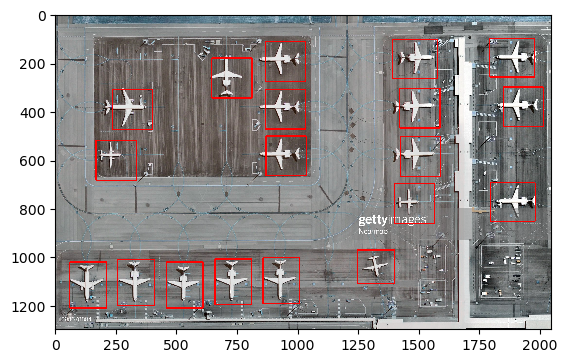

In [159]:
boxes_redundant = bounding_boxes(image, template_1) # calculate bounding boxes
boxes_redundant_2 = bounding_boxes(image, template_2)
boxes_redundant_3 = bounding_boxes(image, template_3) # calculate bounding boxes
boxes_redundant_4 = bounding_boxes(image, template_4) # calculate bounding boxes

all_boxes=np.concatenate((boxes_redundant,boxes_redundant_2,boxes_redundant_3,boxes_redundant_4),axis=0)

print(all_boxes,np.shape(all_boxes))
print("another one")
print(boxes_redundant,np.shape(boxes_redundant))

# boxes = NMS(boxes_redundant)                                            # remove redundant bounding boxes
boxes = NMS(all_boxes)                                            # remove redundant bounding boxes

# overlapping_BB_image = draw_bounding_boxes(image,boxes_redundant)  # draw image with all redundant bounding boxes
# segmented_image = draw_bounding_boxes(image,boxes)           # draw the bounding boxes onto the image
print(boxes)
for box in boxes:
        print("inside for")
        x1,y1=box[:2]
        x2,y2=box[2:]
        image = cv2.rectangle(image,(x1,y1), (x2,y2), (255,0,0), 3)
pyplot.imshow(image)
pyplot.show()
# pyplot.imshow(overlapping_BB_image)
# pyplot.show()
# pyplot.imshow(segmented_image)
# pyplot.show()